In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option("display.max_columns", 50)

In [2]:
img_path = os.path.exists("../img/")
if img_path == False:
    os.mkdir("../img/")
else:
    print("path already exists")

path already exists


In [3]:
merged = pd.read_csv("../nbs/data/merged.csv")

/var/folders/xf/_6m_tb052fn5p84tlt773rqr0000gn/T/ipykernel_13806/4166847499.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  merged = pd.read_csv("../nbs/data/merged.csv")


## CHECK FOR MISSING VALUES

In [4]:
merged.isnull().sum()
missing_values_df = pd.DataFrame(columns=['MissingVal%'], index=merged.columns)
for col in merged.columns:
    missing_values_df.loc[col, 'MissingVal%'] = np.ceil((merged[col].isnull().sum()/merged.shape[0]) * 100)

missing_values_df

,MissingVal%
sku,0.0
national_inv,1.0
lead_time,6.0
in_transit_qty,1.0
forecast_3_month,1.0
forecast_6_month,1.0
forecast_9_month,1.0
sales_1_month,1.0
sales_3_month,1.0
sales_6_month,1.0


## CHECKING FOR DATA TYPES

In [5]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [6]:
#remove the two rows of all NA's
merged=merged[pd.notnull(merged['national_inv'])]

In [7]:
quantvars = merged.select_dtypes(include=['float64']).columns.to_list()

cat_cols = merged.select_dtypes(include='object').columns.to_list()
cat_cols.remove('sku')
for category in cat_cols:
    print(f'👉 {category} has {merged[category].nunique()} values')

catpred = cat_cols.remove('went_on_backorder')

👉 potential_issue has 2 values
👉 deck_risk has 2 values
👉 oe_constraint has 2 values
👉 ppap_risk has 2 values
👉 stop_auto_buy has 2 values
👉 rev_stop has 2 values
👉 went_on_backorder has 2 values


### Encoding Category columns

In [8]:
for category in cat_cols:
    merged[category] = merged[category].astype('category').cat.codes

In [9]:
merged['perf_12_month_avg'] = merged['perf_12_month_avg'].replace(-99, np.NaN)
merged['perf_6_month_avg'] = merged['perf_6_month_avg'].replace(-99, np.NaN)

merged.head(5)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,NaN,0.0,0,0,0,1,0,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,NaN,0.0,1,0,0,1,0,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,NaN,NaN,0.0,1,0,0,1,0,No


### DESCRIPTIVE STATISTICS AND PLOT

In [10]:
merged[quantvars].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


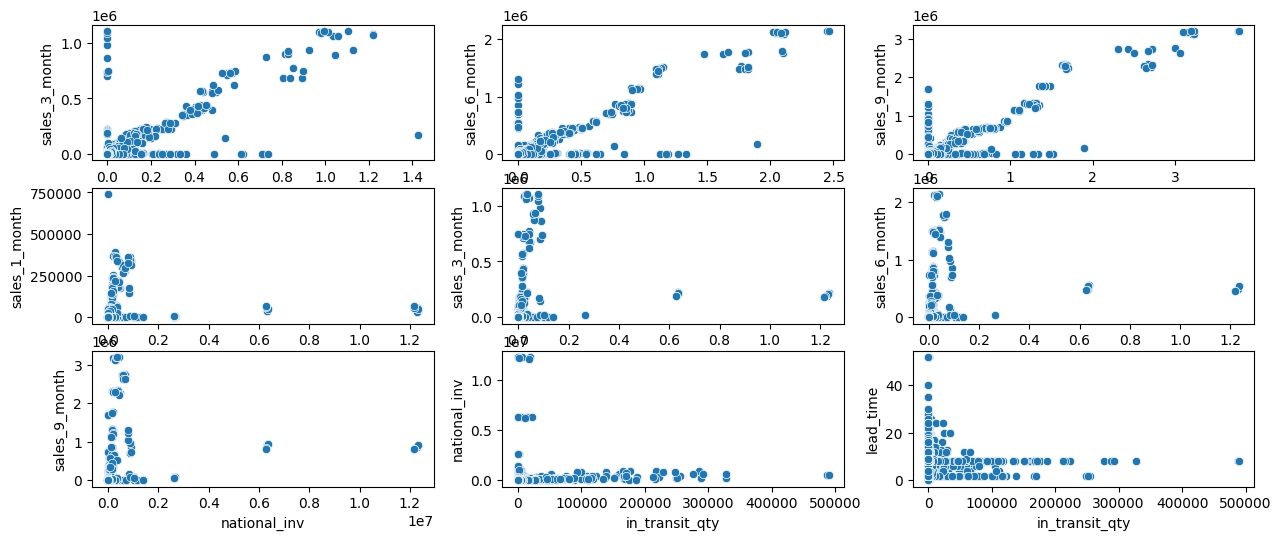

In [11]:
fig, axs= plt.subplots(3, 3, figsize = (15, 6))
sns.scatterplot(x=merged.forecast_3_month, y=merged.sales_3_month, ax=axs[0, 0])
sns.scatterplot(x=merged.forecast_6_month, y=merged.sales_6_month, ax=axs[0, 1])
sns.scatterplot(x=merged.forecast_9_month, y=merged.sales_9_month, ax=axs[0, 2])
sns.scatterplot(x=merged.national_inv, y=merged.sales_1_month, ax=axs[1, 0])
sns.scatterplot(x=merged.national_inv, y=merged.sales_3_month, ax=axs[1, 1])
sns.scatterplot(x=merged.national_inv, y=merged.sales_6_month, ax=axs[1, 2])
sns.scatterplot(x=merged.national_inv, y=merged.sales_9_month, ax=axs[2, 0])
sns.scatterplot(x=merged.in_transit_qty, y=merged.national_inv, ax=axs[2, 1])
sns.scatterplot(x=merged.in_transit_qty, y=merged.lead_time, ax=axs[2, 2])

plt.savefig("../img/Scatter_plot_for_sales.png")

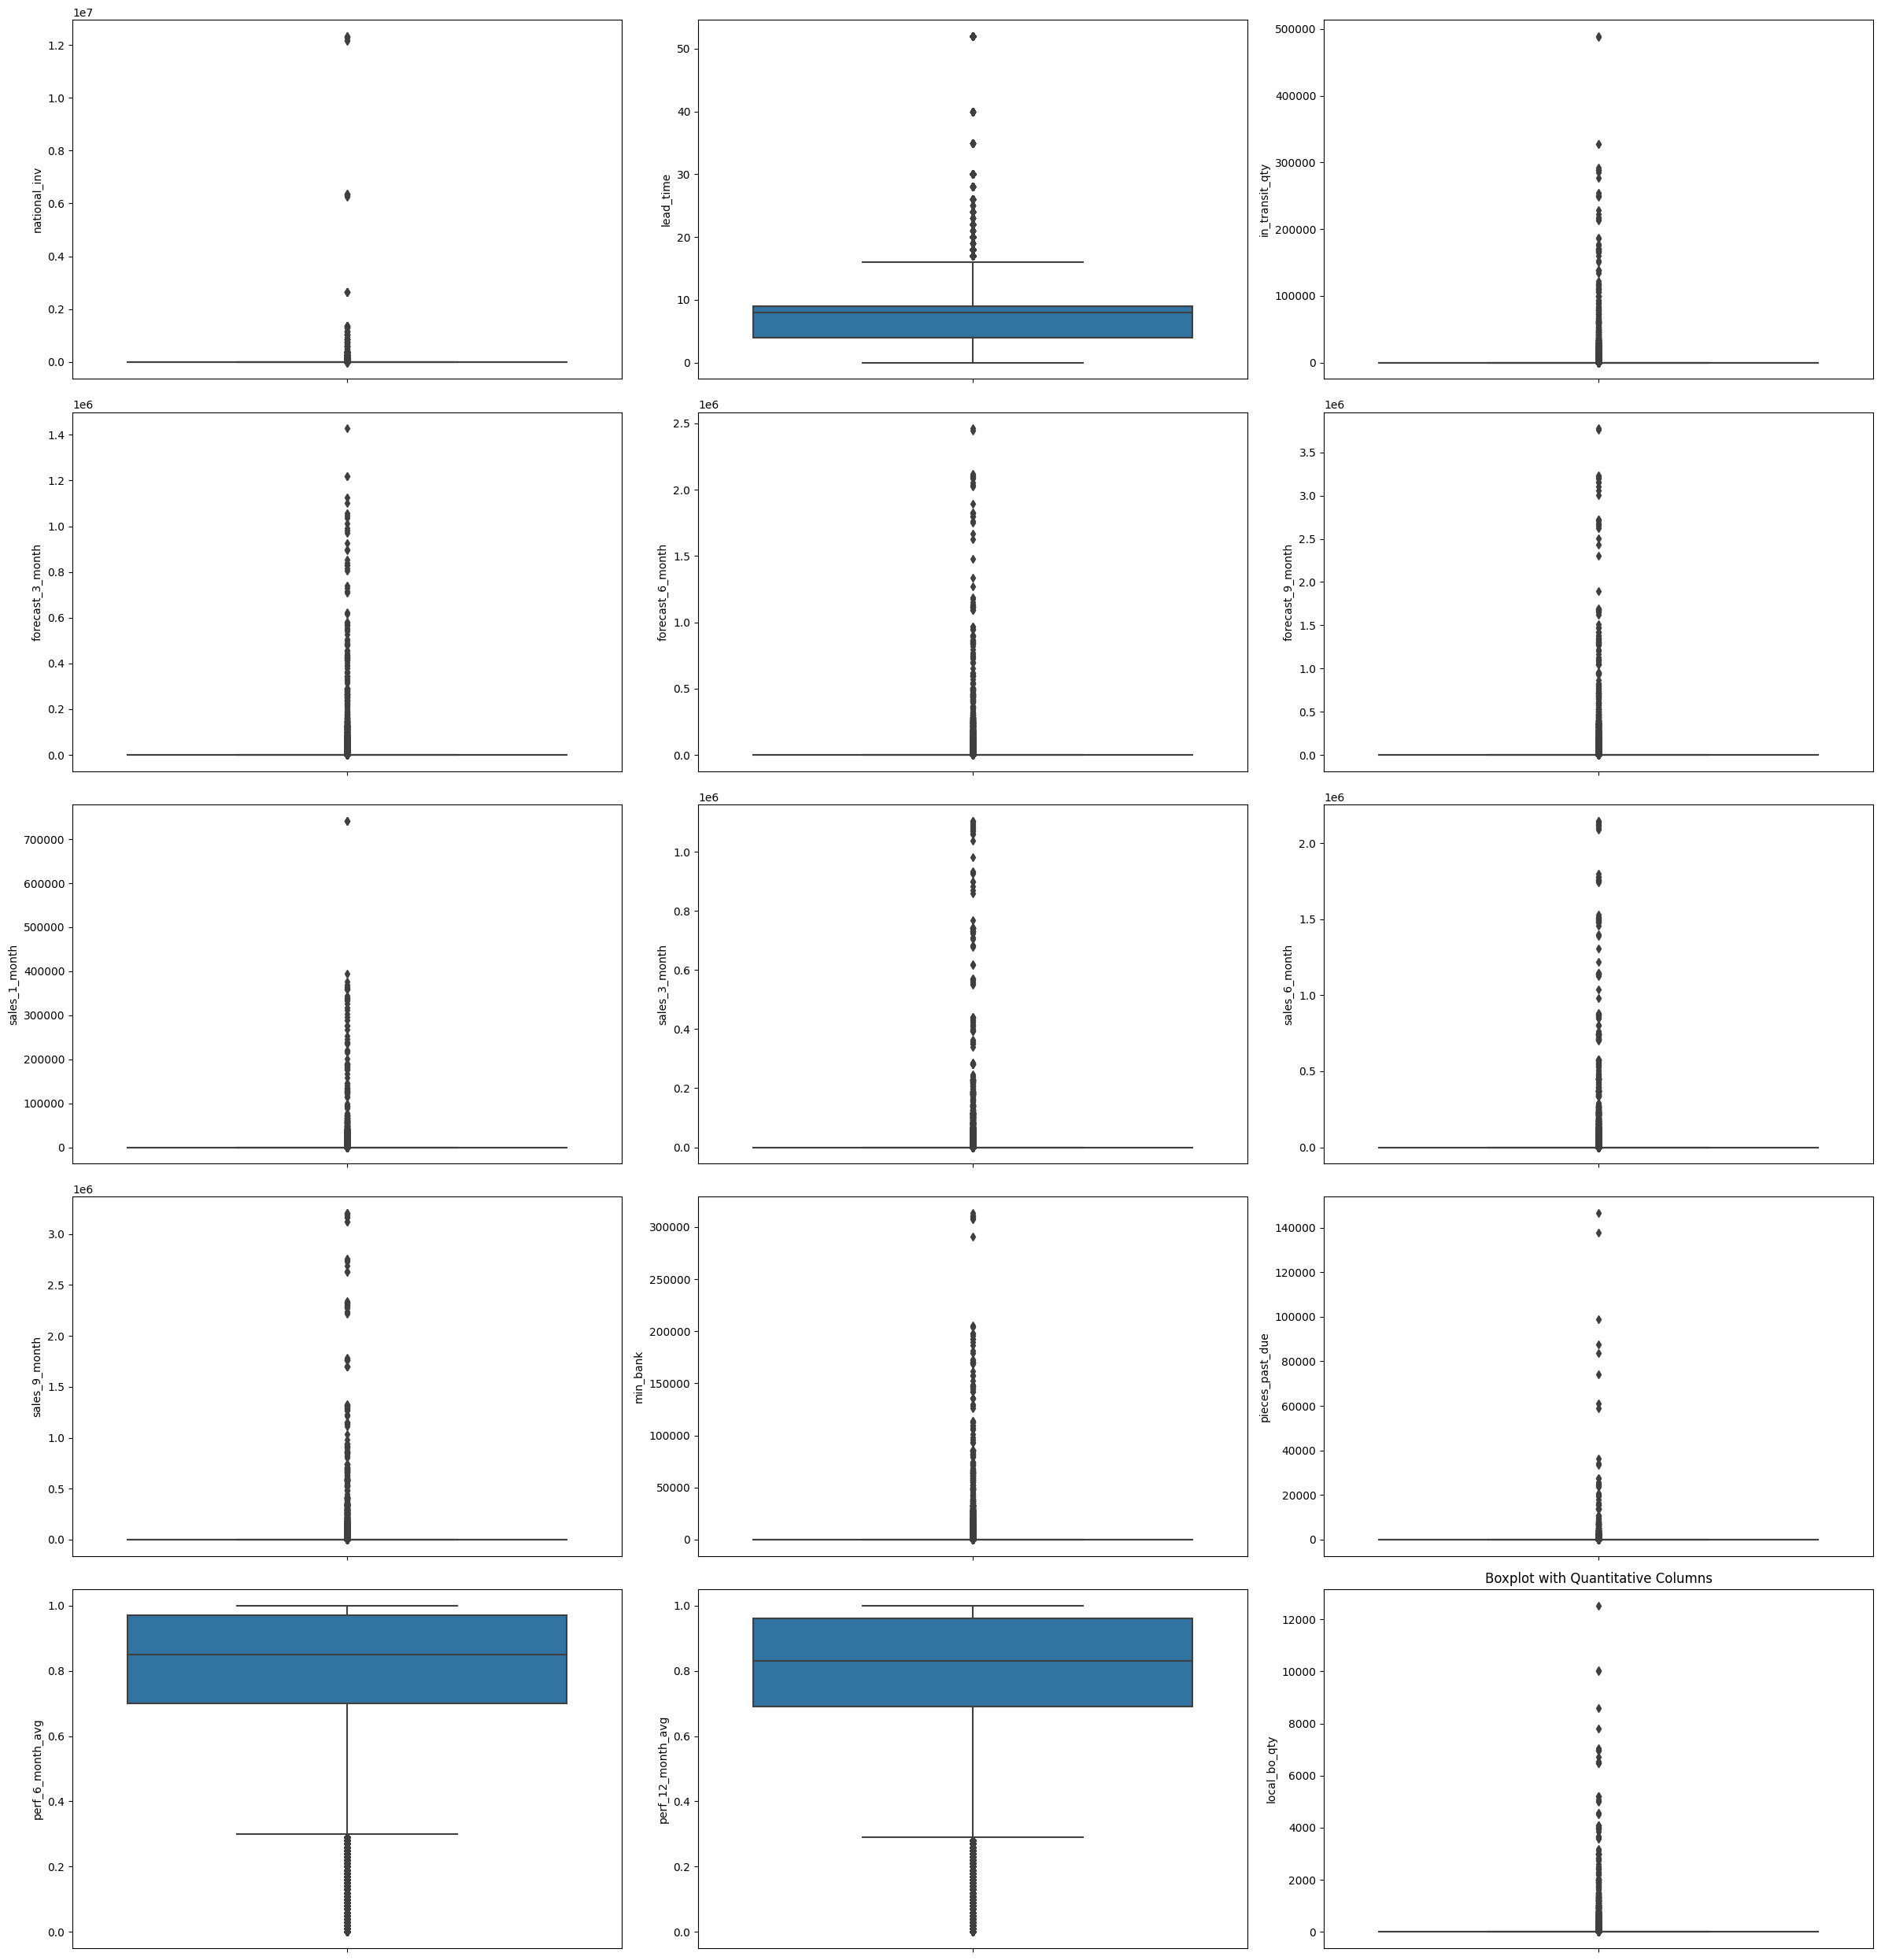

<Figure size 640x480 with 0 Axes>

In [12]:
n_columns = 3
n_rows = 5
_, axs = plt.subplots(n_rows, n_columns, figsize=(8 * n_columns, 5 * n_rows))
for i, c in enumerate(quantvars):
    sns.boxplot(y= c, data= merged, ax= axs[i // n_columns, i % n_columns])

plt.title("Boxplot with Quantitative Columns")
plt.tight_layout()
plt.show()

plt.savefig("../img/Boxplot_quant_cols.png")

In [13]:
catpred = cat_cols
catpred

['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop']

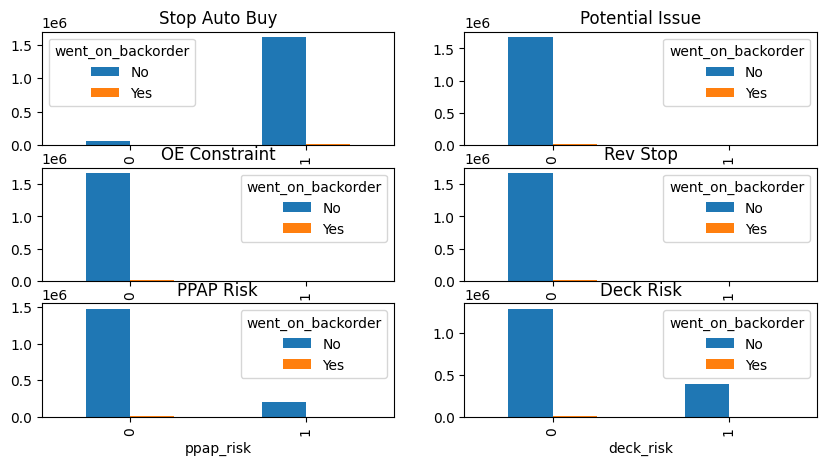

In [14]:
fig, axs = plt.subplots(3, 2, figsize = (10, 5))
# plt.subplots_adjust(hspace=0.1, wspace=0.4)
pd.crosstab(merged.stop_auto_buy, merged.went_on_backorder).plot(kind='bar', ax=axs[0, 0], title="Stop Auto Buy")
pd.crosstab(merged.potential_issue, merged.went_on_backorder).plot(kind='bar', ax=axs[0, 1], title="Potential Issue")
pd.crosstab(merged.oe_constraint, merged.went_on_backorder).plot(kind='bar', ax=axs[1, 0], title="OE Constraint")
pd.crosstab(merged.rev_stop, merged.went_on_backorder).plot(kind='bar', ax=axs[1, 1], title="Rev Stop")
pd.crosstab(merged.ppap_risk, merged.went_on_backorder).plot(kind='bar', ax=axs[2, 0], title="PPAP Risk")
pd.crosstab(merged.deck_risk, merged.went_on_backorder).plot(kind='bar', ax=axs[2, 1], title="Deck Risk")
plt.savefig("../img/Categories_with_targets.png")

### Correlation Plot